We are going to select those events which have equivalent reconstructed energies.

In [1]:
##Libraries needed
import numpy as np
import pandas as pd
import h5py 
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

First, we take the gamma simulations and select events which have primary energy (E0) between [80 000; 120 000 ] GeV

In [2]:

primary = "gamma"
size = 560 #detector radius, area: 1km^2

filename_train = "photon_alt5200m_qgsii_fluka_r560m_3PMTs.h5"
particle = "Gamma"


In [3]:
#Read data
f = h5py.File(filename_train, mode = "r")

group = f["data"]

#Read shower parameters
InfoDF = pd.read_hdf(filename_train, key = "info")
ID_showers = InfoDF.iloc[:,0].values
E0_train = InfoDF.iloc[:,1].values
theta0_train = InfoDF.iloc[:,2].values
Nmuons_train = InfoDF.iloc[:,3].values

#Read input for the algorithm
#X_train: channel1 -> e.m. energy, channel2 -> particles, channel3 -> muons
X_train = group[()]
Y_train = InfoDF.iloc[:,-1].values


#Close file
f.close()

In [4]:
#Energy threshold
E_min = 60000 #min energy
E_max = 80000 #max energy
index_to_use = np.where((E0_train>E_min) & (E0_train<E_max))[0]
data_thres = X_train[index_to_use,:,:]

For these events, we draw the histogram for the total signal at the ground

In [5]:
total_signal = []
for i in range(len(data_thres)):
    total_signal.append(np.sum(data_thres[i]))
    

(array([ 79.,  37., 167., 213., 122.,   9.,   0.,   0.,   0.,   1.]),
 array([3.2579998e+01, 4.7586585e+06, 9.5172840e+06, 1.4275910e+07,
        1.9034536e+07, 2.3793162e+07, 2.8551788e+07, 3.3310414e+07,
        3.8069040e+07, 4.2827668e+07, 4.7586292e+07], dtype=float32),
 <BarContainer object of 10 artists>)

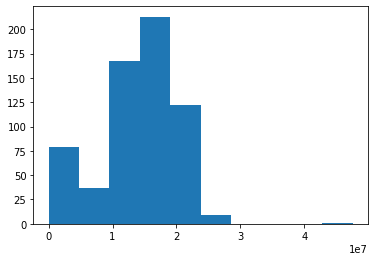

In [6]:
plt.hist(total_signal)

We compute the mean value of this distribution (mean) and its standard deviation (sigma)

In [7]:
mean = np.mean(total_signal)

In [8]:
mean

13838320.0

In [9]:
sigma = np.std(total_signal)

In [10]:
sigma

6520226.5

We apply the following cut to this distribution S >= mean - sigma and S <= mean + sigma and select only gamma events that fulfil this cut

In [11]:
values = []
idx = []
for i in range(len(total_signal)):
    if ((total_signal[i] < mean+sigma) & (total_signal[i] > mean-sigma)):
        values.append(total_signal[i])
        idx.append(i)
    

In [12]:
gamma_data = data_thres[idx]

In [13]:
len(gamma_data)

464

We save this gamma data

In [14]:
for i in range(len(gamma_data)):
    fig = plt.figure(figsize=(4,4))
    plt.imshow(gamma_data[i,:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
    plt.axis('off')
    filename = './data_thres/'+str(primary)+'/'+str(primary)+'_id'+str(i)+'.jpg'
    plt.savefig(filename)
    plt.close(fig)

Now we take all proton shower events and draw the distribution of the total signal (event-by-event)

In [2]:
primary = "proton"

filename_train = "proton_alt5200m_qgsii_fluka_r560m_3PMTs.h5"
particle = "Proton"



In [3]:
#Read data
f = h5py.File(filename_train, mode = "r")

group = f["data"]

#Read shower parameters
InfoDF = pd.read_hdf(filename_train, key = "info")
ID_showers = InfoDF.iloc[:,0].values
E0_train = InfoDF.iloc[:,1].values
theta0_train = InfoDF.iloc[:,2].values
Nmuons_train = InfoDF.iloc[:,3].values

#Read input for the algorithm
#X_train: channel1 -> e.m. energy, channel2 -> particles, channel3 -> muons
X_train = group[()]
Y_train = InfoDF.iloc[:,-1].values


#Close file
f.close()

In [4]:
total_signal = []
for i in range(len(X_train)):
    total_signal.append(np.sum(X_train[i]))
    

(array([2.0275e+04, 3.6950e+03, 2.2020e+03, 1.5570e+03, 1.0490e+03,
        6.8700e+02, 3.1300e+02, 1.5100e+02, 4.2000e+01, 1.5000e+01]),
 array([       0. ,  2100903.5,  4201807. ,  6302711. ,  8403614. ,
        10504518. , 12605422. , 14706325. , 16807228. , 18908132. ,
        21009036. ], dtype=float32),
 <BarContainer object of 10 artists>)

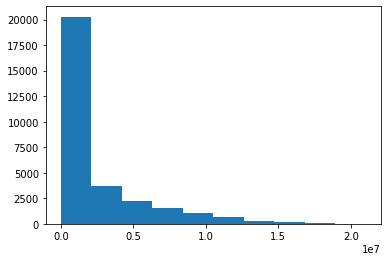

In [5]:
plt.hist(total_signal)

In [6]:
mean = 13838320.0
sigma = 6520226.5

In [7]:
values = []
idx = []
for i in range(len(total_signal)):
    if ((total_signal[i] < mean+sigma) & (total_signal[i] > mean-sigma)):
        values.append(total_signal[i])
        idx.append(i)
    
    

In [8]:
proton_data = X_train[idx]

In [9]:
len(proton_data)

2980

In [10]:
for i in range(len(proton_data)):
    fig = plt.figure(figsize=(4,4))
    plt.imshow(proton_data[i,:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
    plt.axis('off')
    filename = './data_thres/'+str(primary)+'/'+str(primary)+'_id'+str(i)+'.jpg'
    plt.savefig(filename)
    plt.close(fig)

Same with iron

In [2]:
primary = "iron"
filename_train = "iron_alt5200m_qgsii_fluka_r560m_3PMTs.h5"
particle = "Iron"



In [3]:
#Read data
f = h5py.File(filename_train, mode = "r")

group = f["data"]

#Read shower parameters
InfoDF = pd.read_hdf(filename_train, key = "info")
ID_showers = InfoDF.iloc[:,0].values
E0_train = InfoDF.iloc[:,1].values
theta0_train = InfoDF.iloc[:,2].values
Nmuons_train = InfoDF.iloc[:,3].values

#Read input for the algorithm
#X_train: channel1 -> e.m. energy, channel2 -> particles, channel3 -> muons
X_train = group[()]
Y_train = InfoDF.iloc[:,-1].values


#Close file
f.close()

In [4]:
total_signal = []
for i in range(len(X_train)):
    total_signal.append(np.sum(X_train[i]))

(array([1.6978e+04, 5.5590e+03, 3.2030e+03, 2.1920e+03, 1.3850e+03,
        5.2300e+02, 1.1000e+02, 2.2000e+01, 1.0000e+00, 1.0000e+00]),
 array([       0. ,  1077656.2,  2155312.5,  3232969. ,  4310625. ,
         5388281.5,  6465938. ,  7543594. ,  8621250. ,  9698907. ,
        10776563. ], dtype=float32),
 <BarContainer object of 10 artists>)

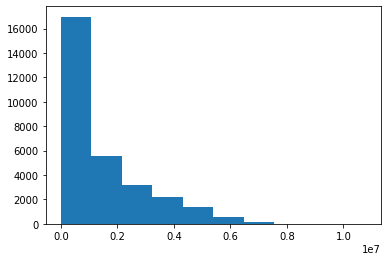

In [5]:
plt.hist(total_signal)

In [6]:
mean = 13838320.0
sigma = 6520226.5

In [7]:
values = []
idx = []
for i in range(len(total_signal)):
    if ((total_signal[i] < mean+sigma) & (total_signal[i] > mean-sigma)):
        values.append(total_signal[i])
        idx.append(i)
    

In [8]:
iron_data = X_train[idx]

In [9]:
len(iron_data)

43

In [10]:
for i in range(len(iron_data)):
    fig = plt.figure(figsize=(4,4))
    plt.imshow(iron_data[i,:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
    plt.axis('off')
    filename = './data_thres/'+str(primary)+'/'+str(primary)+'_id'+str(i)+'.jpg'
    plt.savefig(filename)
    plt.close(fig)